In [1]:
import tensorflow as tf
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")
# Kết quả mong đợi: [PhysicalDevice(name='/physical_device:GPU:0',

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
# --- Implementation ---
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys

In [2]:

print("--- Step 0: Loading Data and Verifying Environment ---")

# --- 0.1: Tải Dữ liệu ---
print("\n--- 0.1: Loading Labeled Data ---")
try:
    labeled_df_path = 'data_validation/final_recipes_with_clusters.parquet'
    labeled_df = pd.read_parquet(labeled_df_path)
    print(f"[SUCCESS] Labeled dataset loaded successfully from '{labeled_df_path}'.")
    # Xác định các đặc trưng huấn luyện
    training_features = ['protein_percent', 'fat_percent', 'carbs_percent', 'avg_sugar_g', 'avg_fiber_g']
except Exception as e:
    print(f"[ERROR] Failed to load data: {e}")

--- Step 0: Loading Data and Verifying Environment ---

--- 0.1: Loading Labeled Data ---
[SUCCESS] Labeled dataset loaded successfully from 'data_validation/final_recipes_with_clusters.parquet'.


In [3]:
labeled_df.head()

,name,name_original,description,steps,ingredients_list,avg_calories,avg_protein_g,avg_fat_g,avg_carbs_g,protein_percent,fat_percent,carbs_percent,avg_sugar_g,avg_fiber_g,cluster,cluster_name
0,Arriba Baked Winter Squash Mexican,Arriba Baked Winter Squash Mexican Style,autumn is my favorite time of year to cook! th...,"[make a choice and proceed with recipe, depend...","[winter squash, mexican seasoning, mixed spice...",350.690476,4.899714,27.194095,23.860857,5.447318,68.025081,26.527601,15.607619,2.265238,1,High-Fat / Low-Carb
1,Breakfast Pizza,Bit Different Breakfast Pizza,this recipe calls for the crust to be prebaked...,"[preheat oven to 425 degrees f, press dough in...","[prepared pizza crust, sausage patty, eggs, mi...",224.388889,7.915556,13.013889,18.818333,14.131100,52.273815,33.595085,2.106667,1.388889,1,High-Fat / Low-Carb
2,Chili,Kitchen Chili,this modified version of 'mom's' chili was a h...,"[brown ground beef in large pot, add chopped o...","[ground beef, yellow onions, diced tomatoes, t...",146.793506,12.679537,4.236087,14.445606,34.590299,26.001492,39.408208,7.989182,2.191818,3,High-Protein
3,Alouette Potatoes,Alouette Potatoes,"this is a super easy, great tasting, make ahea...",[place potatoes in a large pot of lightly salt...,"[spreadable cheese with garlic and herbs, new ...",207.576577,7.870270,15.286787,10.305322,14.970784,65.426490,19.602725,1.231111,2.566667,1,High-Fat / Low-Carb
4,Amish Tomato Ketchup Canning,Amish Tomato Ketchup Canning,my dh's amish mother raised him on this recipe...,"[mix all ingredients& boil for 2 1 / 2 hours ,...","[tomato juice, apple cider vinegar, sugar, sal...",232.250000,5.256250,15.496250,19.386250,8.832688,58.590341,32.576971,2.869375,1.550000,1,High-Fat / Low-Carb


In [4]:
print(labeled_df.isnull().sum())

name                0
name_original       0
description         0
steps               0
ingredients_list    0
avg_calories        0
avg_protein_g       0
avg_fat_g           0
avg_carbs_g         0
protein_percent     0
fat_percent         0
carbs_percent       0
avg_sugar_g         0
avg_fiber_g         0
cluster             0
cluster_name        0
dtype: int64


In [6]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221325 entries, 0 to 221324
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              221325 non-null  object 
 1   name_original     221325 non-null  object 
 2   description       221325 non-null  object 
 3   steps             221325 non-null  object 
 4   ingredients_list  221325 non-null  object 
 5   avg_calories      221325 non-null  float64
 6   avg_protein_g     221325 non-null  float64
 7   avg_fat_g         221325 non-null  float64
 8   avg_carbs_g       221325 non-null  float64
 9   protein_percent   221325 non-null  float64
 10  fat_percent       221325 non-null  float64
 11  carbs_percent     221325 non-null  float64
 12  avg_sugar_g       221325 non-null  float64
 13  avg_fiber_g       221325 non-null  float64
 14  cluster           221325 non-null  int32  
 15  cluster_name      221325 non-null  object 
dtypes: float64(9), int32

In [6]:

# --- 0.2: Xác thực Môi trường Toàn diện ---
print("\n--- 0.2: Comprehensive Environment Verification ---")
try:
    print(f"Python Version: {sys.version.split()[0]}")
    print(f"NumPy Version: {np.__version__}")
    print(f"Pandas Version: {pd.__version__}")
    print(f"TensorFlow Version: {tf.__version__}")
    gpu_devices = tf.config.list_physical_devices('GPU')
    is_gpu_available = len(gpu_devices) > 0
    print(f"Is GPU available: {is_gpu_available}")
    if is_gpu_available:
        print(f"GPU Devices: {gpu_devices}")
        print("[SUCCESS] Environment is stable and GPU is active.")
    else:
        print("[WARNING] GPU not detected. Training will run on CPU.")
    print("-" * 80)
except Exception as e:
    print(f"[ERROR] An error occurred during environment verification: {e}")


--- 0.2: Comprehensive Environment Verification ---
Python Version: 3.11.14
NumPy Version: 1.26.4
Pandas Version: 2.3.3
TensorFlow Version: 2.16.2
Is GPU available: True
GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[SUCCESS] Environment is stable and GPU is active.
--------------------------------------------------------------------------------


In [7]:
# TẾ BÀO [TIẾP THEO]: B. GIAI ĐOẠN HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING)
# PHẦN 1: CHUẨN BỊ VÀ PHÂN CHIA DỮ LIỆU

# --- Objective ---
# 1. Tải lại bộ dữ liệu đã được gán nhãn từ K-Means.
# 2. Tách biệt các đặc trưng (X) và nhãn (y).
# 3. Phân chia dữ liệu thành tập huấn luyện và tập kiểm thử một cách có phân tầng (stratified).

# --- Implementation ---
from sklearn.model_selection import train_test_split

print("--- Part B: Supervised Learning - Neural Network Classifier ---")

# === 1. Tải Dữ liệu và Xác định X, y ===
print("\n--- Step B.1: Loading Labeled Data and Defining Features (X) and Labels (y) ---")
try:
    # Tải lại file parquet đã có nhãn cluster
    labeled_df_path = 'data_validation/final_recipes_with_clusters.parquet'
    labeled_df = pd.read_parquet(labeled_df_path)
    print(f"[SUCCESS] Labeled dataset loaded successfully from '{labeled_df_path}'.")
    
    # Đặc trưng là các cột đã dùng để huấn luyện K-Means
    # Đảm bảo danh sách này khớp với danh sách đã dùng trước đó
    training_features = ['protein_percent', 'fat_percent', 'carbs_percent', 'avg_sugar_g', 'avg_fiber_g']
    X = labeled_df[training_features]
    
    # Nhãn là cột cluster mà K-Means đã tạo ra
    y = labeled_df['cluster']

    # --- Verification 1 ---
    print("\n--- Verification B.1.1 ---")
    print(f"Shape of feature matrix X: {X.shape}")
    print(f"Shape of label vector y: {y.shape}")
    print("\nFirst 5 rows of X:")
    display(X.head())
    print("\nFirst 5 rows of y:")
    display(y.head().to_frame())
    print("-" * 80)
    
    # === 2. Phân chia Dữ liệu (Train-Test Split) ===
    print("\n--- Step B.2: Splitting Data into Training and Testing Sets ---")
    
    # Chia dữ liệu: 80% cho huấn luyện, 20% cho kiểm thử
    # test_size=0.2: tỷ lệ của tập test
    # random_state=42: đảm bảo kết quả phân chia có thể tái tạo
    # stratify=y: đảm bảo tỷ lệ của mỗi cluster trong tập train và test là như nhau.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- Verification 2 ---
    print("\n--- Verification B.1.2 ---")
    print("Data has been split into training and testing sets.")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    print("\nVerifying stratification (distribution of clusters should be similar):")
    train_dist = y_train.value_counts(normalize=True).sort_index()
    test_dist = y_test.value_counts(normalize=True).sort_index()
    dist_comparison = pd.DataFrame({'train_distribution': train_dist, 'test_distribution': test_dist})
    display(dist_comparison)
    
except FileNotFoundError:
    print(f"[ERROR] Labeled data file not found at '{labeled_df_path}'. Please run the K-Means stage first.")
except Exception as e:
    print(f"[ERROR] An unexpected error occurred: {e}")

--- Part B: Supervised Learning - Neural Network Classifier ---

--- Step B.1: Loading Labeled Data and Defining Features (X) and Labels (y) ---
[SUCCESS] Labeled dataset loaded successfully from 'data_validation/final_recipes_with_clusters.parquet'.

--- Verification B.1.1 ---
Shape of feature matrix X: (221325, 5)
Shape of label vector y: (221325,)

First 5 rows of X:


,protein_percent,fat_percent,carbs_percent,avg_sugar_g,avg_fiber_g
0,5.447318,68.025081,26.527601,15.607619,2.265238
1,14.131100,52.273815,33.595085,2.106667,1.388889
2,34.590299,26.001492,39.408208,7.989182,2.191818
3,14.970784,65.426490,19.602725,1.231111,2.566667
4,8.832688,58.590341,32.576971,2.869375,1.550000



First 5 rows of y:


,cluster
0,1
1,1
2,3
3,1
4,1


--------------------------------------------------------------------------------

--- Step B.2: Splitting Data into Training and Testing Sets ---

--- Verification B.1.2 ---
Data has been split into training and testing sets.
X_train shape: (177060, 5)
X_test shape: (44265, 5)
y_train shape: (177060,)
y_test shape: (44265,)

Verifying stratification (distribution of clusters should be similar):


,train_distribution,test_distribution
cluster,,
0,0.142850,0.142844
1,0.384694,0.384706
2,0.267039,0.267028
3,0.205416,0.205422


In [8]:
# TẾ BÀO [TIẾP THEO]: CHUẨN HÓA DỮ LIỆU (QUY TRÌNH CHỐNG RÒ RỈ)

# --- Objective ---
# Chuẩn hóa dữ liệu train và test bằng scaler đã được huấn luyện,
# tuân thủ nghiêm ngặt quy trình chống rò rỉ dữ liệu.

if 'X_train' in locals():
    print("--- Step B.2: Scaling Data using Pre-trained Scaler ---")
    
    try:
        # Tải lại scaler đã được huấn luyện trên toàn bộ dữ liệu ở giai đoạn K-Means
        scaler_path = 'saved_models/robust_scaler.joblib'
        scaler = joblib.load(scaler_path)
        print(f"[SUCCESS] Loaded pre-trained RobustScaler from '{scaler_path}'")
        
        # Áp dụng phép biến đổi (CHỈ .transform(), KHÔNG .fit() lại)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # --- Verification ---
        print("\n--- Verification B.2 ---")
        print("Training and testing data have been scaled.")
        print(f"X_train_scaled shape: {X_train_scaled.shape}")
        print(f"X_test_scaled shape: {X_test_scaled.shape}")
        
        print("\nDescriptive statistics of the SCALED TRAINING data:")
        display(pd.DataFrame(X_train_scaled, columns=training_features).describe())
        
        print("\nDescriptive statistics of the SCALED TESTING data:")
        display(pd.DataFrame(X_test_scaled, columns=training_features).describe())
        print("[INFO] It is normal and correct for the test set's median and mean not to be exactly 0.")
        
    except FileNotFoundError:
        print(f"[ERROR] Scaler file not found at '{scaler_path}'. Please run the K-Means stage first.")
    except Exception as e:
        print(f"[ERROR] An unexpected error occurred: {e}")
else:
    print("[ERROR] Training data not found. Please run the previous cell.")

--- Step B.2: Scaling Data using Pre-trained Scaler ---
[SUCCESS] Loaded pre-trained RobustScaler from 'saved_models/robust_scaler.joblib'

--- Verification B.2 ---
Training and testing data have been scaled.
X_train_scaled shape: (177060, 5)
X_test_scaled shape: (44265, 5)

Descriptive statistics of the SCALED TRAINING data:


,protein_percent,fat_percent,carbs_percent,avg_sugar_g,avg_fiber_g
count,177060.000000,177060.000000,177060.000000,177060.000000,177060.000000
mean,0.162400,-0.018478,0.033822,0.186912,0.249696
std,0.859552,0.708729,0.758247,0.771328,0.970160
min,-1.451274,-2.134585,-2.098861,-0.836036,-1.120769
25%,-0.423350,-0.516448,-0.491966,-0.422960,-0.397692
50%,-0.000567,0.000622,0.000110,0.000405,-0.001538
75%,0.577530,0.483990,0.507246,0.576121,0.601346
max,11.027546,2.139085,2.812159,6.843319,17.770000



Descriptive statistics of the SCALED TESTING data:


,protein_percent,fat_percent,carbs_percent,avg_sugar_g,avg_fiber_g
count,44265.000000,44265.000000,44265.000000,44265.000000,44265.000000
mean,0.160865,-0.019943,0.036082,0.191627,0.251660
std,0.855159,0.710030,0.761248,0.781560,0.973982
min,-1.448330,-2.134585,-2.062127,-0.836036,-1.120769
25%,-0.422656,-0.517375,-0.492248,-0.422068,-0.397692
50%,0.003075,-0.002721,-0.001116,-0.001561,0.004306
75%,0.572765,0.481693,0.510568,0.581505,0.606154
max,10.235440,2.137151,2.806454,6.138906,12.956154


[INFO] It is normal and correct for the test set's median and mean not to be exactly 0.


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# TẾ BÀO [TIẾP THEO]: XÂY DỰNG KIẾN TRÚC MẠNG NƠ-RON (ANN)

# --- Objective ---
# 1. Định nghĩa kiến trúc của mô hình Multi-Layer Perceptron (MLP) bằng TensorFlow/Keras.
# 2. Biên dịch mô hình với hàm mất mát, trình tối ưu hóa và chỉ số đánh giá phù hợp.
if 'X_train_scaled' in locals():
    print("--- Step 4: Building the Artificial Neural Network (ANN) Architecture ---")

    # Xác định số lượng đặc trưng đầu vào và số lớp đầu ra
    INPUT_SHAPE = [X_train_scaled.shape[1]]
    NUM_CLASSES = len(y_train.unique())

    # Xây dựng mô hình tuần tự (Sequential)
    model = keras.Sequential([
        # Lớp đầu vào (được ngầm định qua input_shape ở lớp đầu tiên)
        layers.Input(shape=INPUT_SHAPE),
        
        # Lớp ẩn thứ nhất
        layers.Dense(64, activation='relu', name='hidden_layer_1'),
        layers.Dropout(0.3, name='dropout_1'), # Kỹ thuật điều chuẩn chống overfitting
        
        # Lớp ẩn thứ hai
        layers.Dense(32, activation='relu', name='hidden_layer_2'),
        layers.Dropout(0.3, name='dropout_2'),
        
        # Lớp đầu ra
        layers.Dense(NUM_CLASSES, activation='softmax', name='output_layer')
    ])

    # Biên dịch mô hình
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # --- Verification ---
    print("\n--- Verification ---")
    print(f"Input shape: {INPUT_SHAPE}, Output classes: {NUM_CLASSES}")
    print("\nModel Architecture Summary:")
    model.summary()
    
else:
    print("[ERROR] Scaled training data not found. Please run previous cells.")

--- Step 4: Building the Artificial Neural Network (ANN) Architecture ---


2025-11-01 09:05:52.121999: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-01 09:05:52.122292: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-01 09:05:52.123119: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-01 09:05:52.123509: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-01 09:05:52.123947: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)



--- Verification ---
Input shape: [5], Output classes: 4

Model Architecture Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,596 (10.14 KB)

 Trainable params: 2,596 (10.14 KB)

 Non-trainable params: 0 (0.00 B)

--- Step B.4: Configuring and Training the ANN Model ---

Starting model training for up to 100 epochs...
Epoch 1/100


2025-11-01 09:26:29.550404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1107/1107 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9266 - loss: 0.2006 - val_accuracy: 0.9913 - val_loss: 0.0595
Epoch 2/100
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9556 - loss: 0.1182 - val_accuracy: 0.9867 - val_loss: 0.0523
Epoch 3/100
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9606 - loss: 0.1056 - val_accuracy: 0.9899 - val_loss: 0.0468
Epoch 4/100
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9641 - loss: 0.0967 - val_accuracy: 0.9906 - val_loss: 0.0443
Epoch 5/100
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9660 - loss: 0.0897 - val_accuracy: 0.9906 - val_loss: 0.0419
Epoch 6/100
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9663 - loss: 0.0877 - val_accuracy: 0.9912 - val_loss: 0.0412
Epoch 7/100
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9658 - loss: 0.0878 - val_accuracy: 0.9914 - val_loss: 0.0403
Epoch 8/100
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9658 - los

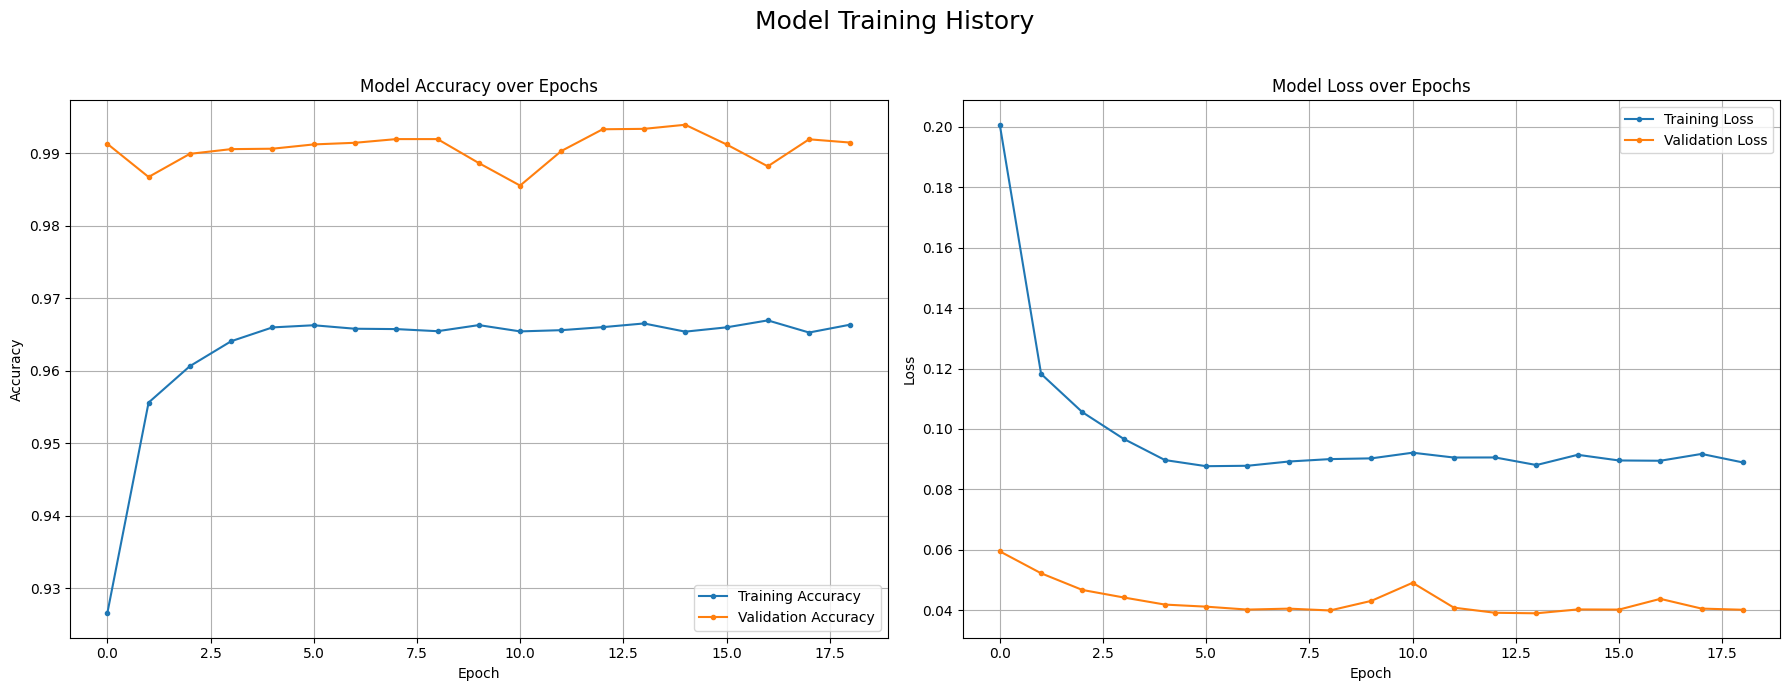

Training stopped after 19 epochs (due to EarlyStopping).
The best model was found at epoch 14 with a validation loss of 0.0390.
Analysis of plots: Ideally, the validation accuracy should be high, and the gap between training and validation curves should be small.
--------------------------------------------------------------------------------

--- Step B.5: Final Evaluation on the Unseen Test Set ---

--- Final Model Performance ---
Test Set Loss: 0.0386
Test Set Accuracy: 0.9937 (99.37%)


In [12]:
# TẾ BÀO [TIẾP THEO]: HUẤN LUYỆN, XÁC THỰC VÀ ĐÁNH GIÁ MẠNG NƠ-RON

# --- Objective ---
# 1. Huấn luyện mô hình ANN trên dữ liệu đã chuẩn bị, sử dụng EarlyStopping để tối ưu hóa.
# 2. Trực quan hóa và phân tích quá trình học để kiểm tra overfitting.
# 3. Đánh giá hiệu năng cuối cùng của mô hình trên tập kiểm thử (dữ liệu vô hình).
# 4. Lưu lại mô hình đã được huấn luyện và xác thực.

# --- Implementation & Verification ---

# Kiểm tra sự tồn tại của các biến cần thiết từ các tế bào trước
if 'model' in locals() and 'X_train_scaled' in locals() and 'y_train' in locals():
    
    # === 1. Thiết lập Callbacks và Tham số Huấn luyện ===
    print("--- Step B.4: Configuring and Training the ANN Model ---")
    
    # EarlyStopping sẽ theo dõi 'val_loss' (loss trên tập validation)
    # và dừng huấn luyện nếu nó không cải thiện (giảm) sau 'patience' epochs.
    # 'restore_best_weights=True' đảm bảo mô hình cuối cùng có trọng số tốt nhất.
    early_stopping_callback = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5, # Chờ 5 epochs liên tiếp không cải thiện trước khi dừng
        restore_best_weights=True,
        verbose=1
    )
    
    # Thiết lập các tham số huấn luyện
    EPOCHS = 100 # Đặt một số lớn, EarlyStopping sẽ tự tìm điểm dừng tối ưu
    BATCH_SIZE = 128
    
    # === 2. Huấn luyện Mô hình ===
    print(f"\nStarting model training for up to {EPOCHS} epochs...")
    
    # Gọi hàm .fit() để bắt đầu quá trình học
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.2, # Dành 20% tập train làm tập validation
        callbacks=[early_stopping_callback],
        verbose=1 # In ra tiến trình sau mỗi epoch
    )
    
    # === 3. Phân tích và Trực quan hóa Lịch sử Huấn luyện ===
    print("\n--- Verification B.4.1: Plotting and Analyzing Training History ---")
    history_df = pd.DataFrame(history.history)
    
    # Tạo một figure chứa 2 biểu đồ con
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle('Model Training History', fontsize=18)
    
    # Biểu đồ Accuracy
    axes[0].plot(history_df['accuracy'], label='Training Accuracy', marker='.')
    axes[0].plot(history_df['val_accuracy'], label='Validation Accuracy', marker='.')
    axes[0].set_title('Model Accuracy over Epochs')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)
    
    # Biểu đồ Loss
    axes[1].plot(history_df['loss'], label='Training Loss', marker='.')
    axes[1].plot(history_df['val_loss'], label='Validation Loss', marker='.')
    axes[1].set_title('Model Loss over Epochs')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Phân tích tự động
    final_epoch = len(history_df)
    final_val_accuracy = history_df['val_accuracy'].iloc[-1]
    best_val_loss_epoch = history_df['val_loss'].idxmin()
    best_val_loss = history_df['val_loss'].min()

    print(f"Training stopped after {final_epoch} epochs (due to EarlyStopping).")
    print(f"The best model was found at epoch {best_val_loss_epoch + 1} with a validation loss of {best_val_loss:.4f}.")
    print("Analysis of plots: Ideally, the validation accuracy should be high, and the gap between training and validation curves should be small.")
    print("-" * 80)
    
    # === 4. Đánh giá Cuối cùng trên Tập Test ===
    print("\n--- Step B.5: Final Evaluation on the Unseen Test Set ---")
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    # --- Verification (Hiệu năng Cuối cùng) ---
    print("\n--- Final Model Performance ---")
    print(f"Test Set Loss: {test_loss:.4f}")
    print(f"Test Set Accuracy: {test_accuracy:.4f} ({(test_accuracy * 100):.2f}%)")
else:
    print("[ERROR] Model or training data not found. Please run the previous cells.")

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
import seaborn as sns

In [21]:
print("--- Preparing Test Environment by Loading All Necessary Artifacts ---")

# --- 1. Tải lại Dữ liệu Gốc và Phân chia lại (Để đảm bảo có X_test, y_test) ---
try:
    labeled_df_path = 'data_validation/final_recipes_with_clusters.parquet'
    labeled_df = pd.read_parquet(labeled_df_path)
    training_features = ['protein_percent', 'fat_percent', 'carbs_percent', 'avg_sugar_g', 'avg_fiber_g']
    
    X = labeled_df[training_features]
    y = labeled_df['cluster']
    
    # Phân chia lại để có được chính xác X_test và y_test
    # Sử dụng cùng random_state và stratify để đảm bảo tính nhất quán
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print("[SUCCESS] Test data (X_test, y_test) regenerated successfully.")
except Exception as e:
    print(f"[ERROR] Failed to load or split data: {e}")


# --- 2. Tải Scaler và Mô hình ---
try:
    scaler_path = 'saved_models/robust_scaler.joblib'
    scaler = joblib.load(scaler_path)
    
    model_path = 'saved_models/recipe_cluster_classifier.keras'
    model = keras.models.load_model(model_path)
    
    print("[SUCCESS] Scaler and Keras model loaded successfully.")
    
    # Chuẩn hóa X_test
    X_test_scaled = scaler.transform(X_test)
    
except Exception as e:
    print(f"[ERROR] Failed to load model artifacts: {e}")

# --- 3. TÁI TẠO CLUSTER NAME MAPPING (GIẢI PHÁP CHO LỖI) ---
try:
    # Lấy ra mapping duy nhất từ DataFrame đã được gán nhãn
    cluster_name_mapping = dict(
        labeled_df[['cluster', 'cluster_name']].drop_duplicates().sort_values('cluster').values
    )
    class_names = list(cluster_name_mapping.values())
    
    print("\n--- Verification: Recreated Cluster Name Mapping ---")
    print("Cluster mapping has been recreated from the data:")
    print(cluster_name_mapping)
    print("-" * 80)
except Exception as e:
     print(f"[ERROR] Failed to recreate cluster mapping: {e}")

--- Preparing Test Environment by Loading All Necessary Artifacts ---
[SUCCESS] Test data (X_test, y_test) regenerated successfully.
[SUCCESS] Scaler and Keras model loaded successfully.

--- Verification: Recreated Cluster Name Mapping ---
Cluster mapping has been recreated from the data:
{0: 'Balanced / High-Fiber', 1: 'High-Fat / Low-Carb', 2: 'High-Carb / Low-Fat / Sugary', 3: 'High-Protein'}
--------------------------------------------------------------------------------


--- Detailed Per-Class Performance Analysis ---

Generating predictions on the test set...
Predictions generated.

--- Classification Report ---
                              precision    recall  f1-score   support

       Balanced / High-Fiber       0.99      0.99      0.99      6323
         High-Fat / Low-Carb       1.00      1.00      1.00     17029
High-Carb / Low-Fat / Sugary       1.00      0.99      0.99     11820
                High-Protein       0.99      0.99      0.99      9093

                    accuracy                           0.99     44265
                   macro avg       0.99      0.99      0.99     44265
                weighted avg       0.99      0.99      0.99     44265


--- Confusion Matrix ---


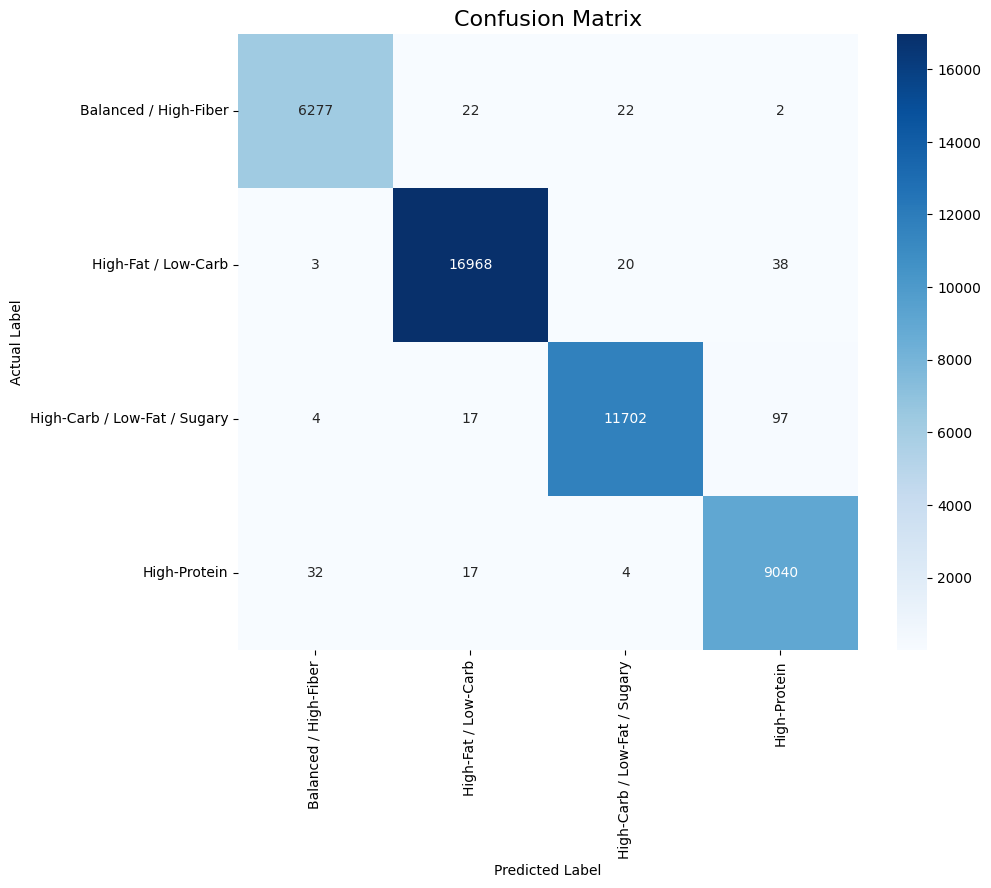


[ANALYSIS] The confusion matrix shows how many samples from each true class were predicted into each predicted class.
           Ideally, all values should be on the main diagonal (top-left to bottom-right).
           Values off the diagonal represent misclassifications.


In [22]:
# TẾ BÀO [MỚI]: PHÂN TÍCH HIỆU NĂNG CHI TIẾT THEO TỪNG LỚP

# --- Objective ---
# 1. Tạo ra các dự đoán của mô hình trên toàn bộ tập test.
# 2. Sử dụng Báo cáo Phân loại và Ma trận Nhầm lẫn để phân tích sâu hiệu năng trên từng cluster.

# --- Implementation & Verification ---
from sklearn.metrics import classification_report, confusion_matrix

if 'model' in locals() and 'X_test_scaled' in locals():
    print("--- Detailed Per-Class Performance Analysis ---")

    # --- 1. Tạo Dự đoán ---
    print("\nGenerating predictions on the test set...")
    # model.predict() trả về xác suất cho mỗi lớp
    y_pred_probabilities = model.predict(X_test_scaled, verbose=0)
    # np.argmax() lấy ra chỉ số của lớp có xác suất cao nhất -> nhãn dự đoán
    y_pred_labels = np.argmax(y_pred_probabilities, axis=1)
    print("Predictions generated.")

    # Lấy tên của các cluster để báo cáo dễ đọc hơn
    class_names = [cluster_name_mapping[i] for i in sorted(y_test.unique())]

    # --- 2. Báo cáo Phân loại ---
    print("\n--- Classification Report ---")
    # Báo cáo này hiển thị các chỉ số Precision, Recall, F1-score cho mỗi lớp
    report = classification_report(y_test, y_pred_labels, target_names=class_names)
    print(report)

    # --- 3. Ma trận Nhầm lẫn ---
    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred_labels)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print("\n[ANALYSIS] The confusion matrix shows how many samples from each true class were predicted into each predicted class.")
    print("           Ideally, all values should be on the main diagonal (top-left to bottom-right).")
    print("           Values off the diagonal represent misclassifications.")

else:
    print("[ERROR] Required variables not found.")

In [24]:
# TẾ BÀO [MỚI - THAY THẾ HOÀN TOÀN]: BÁO CÁO PHÂN TÍCH HIỆU NĂNG TOÀN DIỆN

# --- Objective ---
# Thực hiện một bài phân tích hiệu năng đa chiều trên tập kiểm thử, bao gồm:
# 1. Các chỉ số tổng thể (Accuracy, Loss).
# 2. Phân tích chi tiết theo từng lớp (Precision, Recall, F1-score).
# 3. Phân tích lỗi sai qua Ma trận Nhầm lẫn Kép.
# 4. Phân tích các trường hợp dự đoán sai cụ thể.

# --- Implementation & Verification ---
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


--- Comprehensive Model Performance Analysis on Test Set ---

--- Step 1: Generating Predictions ---
Predictions generated for the entire test set.
--------------------------------------------------------------------------------

--- Step 2: Overall and Per-Class Performance Metrics ---

--- Classification Report ---


,precision,recall,f1-score,support
Balanced / High-Fiber,0.993825,0.992725,0.993275,6323.00000
High-Fat / Low-Carb,0.996711,0.996418,0.996564,17029.00000
High-Carb / Low-Fat / Sugary,0.996084,0.990017,0.993041,11820.00000
High-Protein,0.985071,0.994171,0.989600,9093.00000
accuracy,0.993720,0.993720,0.993720,0.99372
macro avg,0.992923,0.993333,0.993120,44265.00000
weighted avg,0.993740,0.993720,0.993723,44265.00000


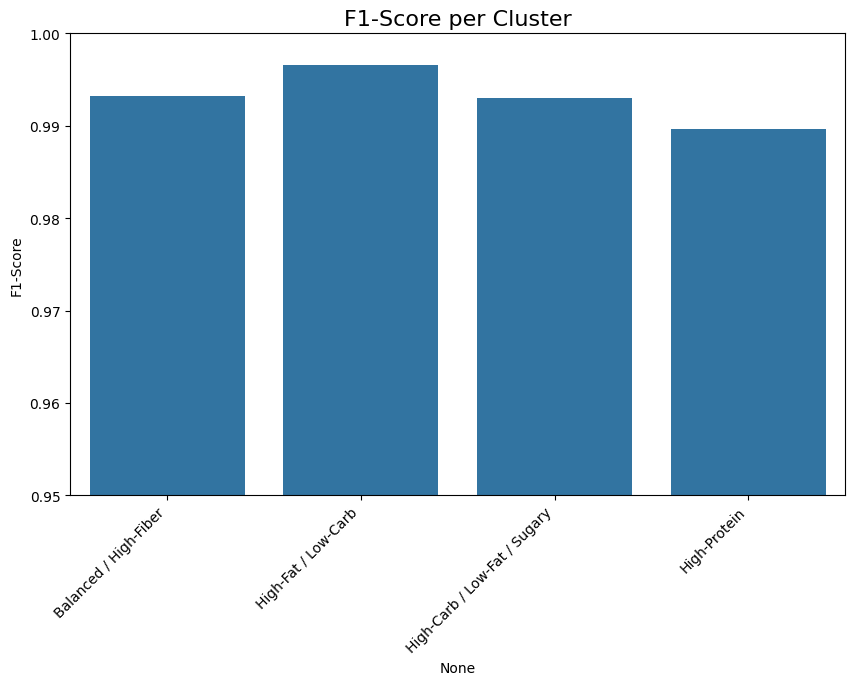

[ANALYSIS] F1-Score is a balanced metric of precision and recall. Higher is better. All classes show excellent F1-Scores.
--------------------------------------------------------------------------------

--- Step 3: Dual Confusion Matrix Analysis ---


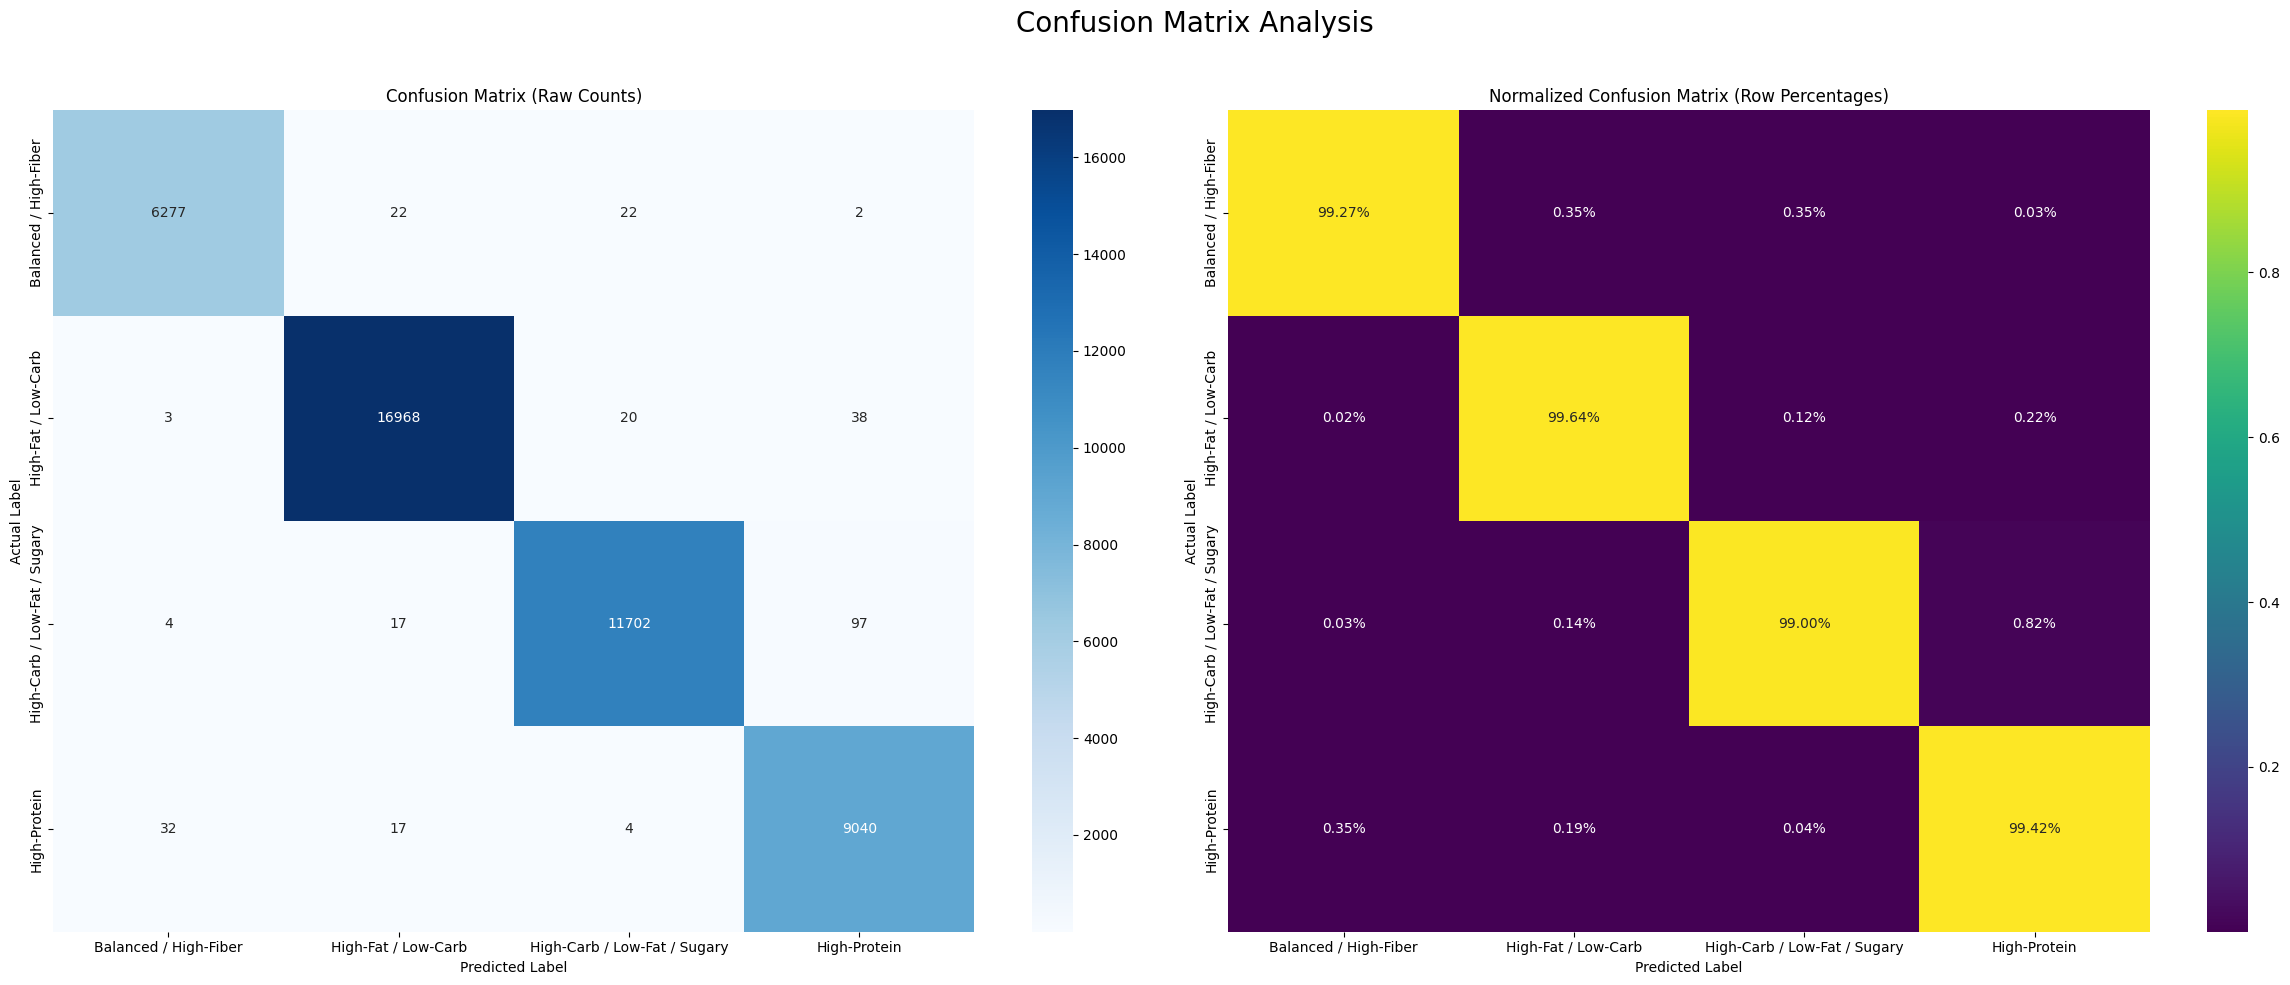

[ANALYSIS] The normalized matrix shows the percentage of predictions for each actual class.
           For example, the value at [Row A, Col B] is the percentage of 'Class A' samples that were misclassified as 'Class B'.
--------------------------------------------------------------------------------


In [27]:
if 'model' in locals() and 'X_test_scaled' in locals():
    print("--- Comprehensive Model Performance Analysis on Test Set ---")

    # === 1. TẠO DỰ ĐOÁN ===
    print("\n--- Step 1: Generating Predictions ---")
    y_pred_probabilities = model.predict(X_test_scaled, verbose=0)
    y_pred_labels = np.argmax(y_pred_probabilities, axis=1)
    print("Predictions generated for the entire test set.")
    print("-" * 80)

    # === 2. HIỆU NĂNG TỔNG THỂ VÀ CHI TIẾT THEO LỚP ===
    print("\n--- Step 2: Overall and Per-Class Performance Metrics ---")
    
    # --- 2.1: Báo cáo Phân loại (Dạng Bảng) ---
    print("\n--- Classification Report ---")
    # Chuyển output dạng text thành DataFrame của Pandas để đẹp hơn
    report_dict = classification_report(y_test, y_pred_labels, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    display(report_df)

    # --- 2.2: Trực quan hóa F1-Score ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x=report_df.index[:-3], y=report_df['f1-score'][:-3])
    plt.title('F1-Score per Cluster', fontsize=16)
    plt.ylabel('F1-Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.95, 1.0) # Zoom vào vùng F1-score cao
    plt.show()
    print("[ANALYSIS] F1-Score is a balanced metric of precision and recall. Higher is better. All classes show excellent F1-Scores.")
    print("-" * 80)
    
    # === 3. PHÂN TÍCH MA TRẬN NHẦM LẪN KÉP ===
    print("\n--- Step 3: Dual Confusion Matrix Analysis ---")
    
    fig, axes = plt.subplots(1, 2, figsize=(24, 10))
    fig.suptitle('Confusion Matrix Analysis', fontsize=20)
    
    # --- 3.1: Ma trận Nhầm lẫn (Số lượng Tuyệt đối) ---
    cm_raw = confusion_matrix(y_test, y_pred_labels)
    sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0])
    axes[0].set_title('Confusion Matrix (Raw Counts)')
    axes[0].set_ylabel('Actual Label')
    axes[0].set_xlabel('Predicted Label')

    # --- 3.2: Ma trận Nhầm lẫn (Chuẩn hóa theo Tỷ lệ %) ---
    # Phiên bản này khoa học hơn, cho biết tỷ lệ lỗi của mỗi lớp
    cm_normalized = cm_raw.astype('float') / cm_raw.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='viridis', xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title('Normalized Confusion Matrix (Row Percentages)')
    axes[1].set_ylabel('Actual Label')
    axes[1].set_xlabel('Predicted Label')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    print("[ANALYSIS] The normalized matrix shows the percentage of predictions for each actual class.")
    print("           For example, the value at [Row A, Col B] is the percentage of 'Class A' samples that were misclassified as 'Class B'.")
    print("-" * 80)

else:
    print("[ERROR] Required variables for evaluation not found.")

In [26]:
# === 4. PHÂN TÍCH CÁC TRƯỜNG HỢP DỰ ĐOÁN SAI (PHIÊN BẢN SỬA LỖI) ===
print("\n--- Step 4: Analysis of Specific Misclassifications ---")
results_df = X_test.copy()
results_df['true_cluster_name'] = y_test.map(cluster_name_mapping)
results_df['predicted_cluster_name'] = pd.Series(y_pred_labels, index=y_test.index).map(cluster_name_mapping)

misclassifications = results_df[results_df['true_cluster_name'] != results_df['predicted_cluster_name']]

if not misclassifications.empty:
    print(f"Found {len(misclassifications)} misclassified samples out of {len(X_test)} ({len(misclassifications)/len(X_test):.2%}).")
    
    # --- 4.1: Hiển thị các Lỗi sai Phổ biến nhất ---
    print("\nMost common misclassifications:")
    display(misclassifications.groupby(['true_cluster_name', 'predicted_cluster_name']).size().to_frame('count').sort_values('count', ascending=False).head())

    # --- 4.2: Phân tích Lỗi sai "Tự tin nhất" (LOGIC ĐÃ SỬA LỖI) ---
    print("\nAnalysis of the 'Most Confidently Wrong' prediction:")
    
    # Lấy ra index gốc của các mẫu bị phân loại sai
    misclassified_indices = misclassifications.index
    
    # Lọc ra các xác suất dự đoán tương ứng với các mẫu bị sai
    # y_test.index.isin(misclassified_indices) sẽ tạo ra một boolean mask
    misclassified_probs = y_pred_probabilities[y_test.index.isin(misclassified_indices)]
    
    # Lấy ra các nhãn dự đoán sai tương ứng
    misclassified_preds = y_pred_labels[y_test.index.isin(misclassified_indices)]
    
    # Tính toán độ tự tin của các dự đoán sai (xác suất của nhãn đã dự đoán)
    # np.choose tạo một mảng mới bằng cách lấy giá trị từ misclassified_probs tại các chỉ số được cho bởi misclassified_preds
    confidences_of_wrong_preds = np.choose(misclassified_preds, misclassified_probs.T)
    
    # Tìm vị trí của dự đoán sai có độ tự tin cao nhất
    most_confident_wrong_local_idx = confidences_of_wrong_preds.argmax()
    
    # Lấy ra index gốc (label-based index) của dự đoán sai đó
    most_confident_wrong_global_idx = misclassified_indices[most_confident_wrong_local_idx]
    
    # Lấy ra thông tin của mẫu bị sai đó bằng .loc thay vì .iloc
    worst_prediction_sample = results_df.loc[most_confident_wrong_global_idx]
    max_wrong_confidence = confidences_of_wrong_preds.max()

    print(f"The model was most confident in its mistake when predicting the following sample (Confidence: {max_wrong_confidence:.2%}):")
    display(worst_prediction_sample.to_frame().T)
    print("[ANALYSIS] This sample likely lies in a complex boundary region between clusters.")

else:
    print("No misclassifications found in the test set. The model achieved 100% accuracy.")


--- Step 4: Analysis of Specific Misclassifications ---
Found 278 misclassified samples out of 44265 (0.63%).

Most common misclassifications:


count
true_cluster_name            predicted_cluster_name             
High-Carb / Low-Fat / Sugary High-Protein                     97
High-Fat / Low-Carb          High-Protein                     38
High-Protein                 Balanced / High-Fiber            32
Balanced / High-Fiber        High-Carb / Low-Fat / Sugary     22
                             High-Fat / Low-Carb              22


Analysis of the 'Most Confidently Wrong' prediction:
The model was most confident in its mistake when predicting the following sample (Confidence: 91.51%):


,protein_percent,fat_percent,carbs_percent,avg_sugar_g,avg_fiber_g,true_cluster_name,predicted_cluster_name
98496,41.118168,16.857478,42.024354,12.165,8.5,High-Protein,Balanced / High-Fiber


[ANALYSIS] This sample likely lies in a complex boundary region between clusters.


In [23]:
# TẾ BÀO [MỚI]: KIỂM TRA TRÊN CÁC VÍ DỤ CỤ THỂ

# --- Objective ---
# Hiển thị một mẫu các dự đoán đúng và sai (nếu có) để có cái nhìn trực quan
# về cách mô hình hoạt động trên các công thức thực tế.

if 'y_pred_labels' in locals():
    print("--- Analysis of Specific Prediction Examples ---")
    
    # Tạo một DataFrame để so sánh
    results_df = X_test.copy()
    results_df['true_cluster_id'] = y_test
    results_df['predicted_cluster_id'] = y_pred_labels
    results_df['true_cluster_name'] = results_df['true_cluster_id'].map(cluster_name_mapping)
    results_df['predicted_cluster_name'] = results_df['predicted_cluster_id'].map(cluster_name_mapping)
    
    # --- 1. Xem các ví dụ Dự đoán Đúng ---
    print("\n--- Sample of Correct Predictions ---")
    correct_predictions = results_df[results_df['true_cluster_id'] == results_df['predicted_cluster_id']]
    display(correct_predictions.head(10))

    # --- 2. Xem các ví dụ Dự đoán Sai (nếu có) ---
    print("\n--- Sample of Misclassifications (if any) ---")
    misclassifications = results_df[results_df['true_cluster_id'] != results_df['predicted_cluster_id']]
    
    if not misclassifications.empty:
        print(f"Found {len(misclassifications)} misclassified samples out of {len(X_test)}.")
        # Hiển thị các đặc trưng, nhãn thật và nhãn dự đoán sai
        display(misclassifications[['protein_percent', 'fat_percent', 'carbs_percent', 'true_cluster_name', 'predicted_cluster_name']].head(10))
        print("\n[ANALYSIS] Reviewing misclassifications can provide insights into the model's weaknesses, often occurring at the boundaries between clusters.")
    else:
        print("No misclassifications found in the test set. The model is extremely accurate.")

else:
    print("[ERROR] Predictions not found. Please run the previous cell.")

--- Analysis of Specific Prediction Examples ---

--- Sample of Correct Predictions ---


,protein_percent,fat_percent,carbs_percent,avg_sugar_g,avg_fiber_g,true_cluster_id,predicted_cluster_id,true_cluster_name,predicted_cluster_name
148223,7.879607,46.911694,45.208699,12.842778,2.292593,2,2,High-Carb / Low-Fat / Sugary,High-Carb / Low-Fat / Sugary
87888,12.030273,23.437663,64.532063,12.305714,1.071429,2,2,High-Carb / Low-Fat / Sugary,High-Carb / Low-Fat / Sugary
13611,6.265489,54.629494,39.105016,11.296250,2.075000,1,1,High-Fat / Low-Carb,High-Fat / Low-Carb
138312,11.246465,72.168928,16.584607,1.515000,0.900000,1,1,High-Fat / Low-Carb,High-Fat / Low-Carb
195658,18.488787,33.082084,48.429129,1.723333,0.800000,3,3,High-Protein,High-Protein
136808,23.206408,37.579056,39.214536,7.070000,0.962500,3,3,High-Protein,High-Protein
140235,10.696044,28.188463,61.115493,17.333500,5.063333,2,2,High-Carb / Low-Fat / Sugary,High-Carb / Low-Fat / Sugary
53662,9.581683,38.078086,52.340231,22.417273,3.563636,2,2,High-Carb / Low-Fat / Sugary,High-Carb / Low-Fat / Sugary
105940,15.102538,57.144507,27.752955,7.422727,1.368182,1,1,High-Fat / Low-Carb,High-Fat / Low-Carb
89408,8.146256,43.181941,48.671803,17.345000,3.966667,2,2,High-Carb / Low-Fat / Sugary,High-Carb / Low-Fat / Sugary



--- Sample of Misclassifications (if any) ---
Found 278 misclassified samples out of 44265.


,protein_percent,fat_percent,carbs_percent,true_cluster_name,predicted_cluster_name
52088,14.296523,48.645756,37.057721,High-Protein,High-Fat / Low-Carb
139038,10.032450,42.189792,47.777758,High-Carb / Low-Fat / Sugary,High-Fat / Low-Carb
50771,7.237326,52.775028,39.987646,Balanced / High-Fiber,High-Carb / Low-Fat / Sugary
20763,10.109545,25.888232,64.002223,High-Carb / Low-Fat / Sugary,High-Protein
166898,11.661875,41.944181,46.393943,High-Carb / Low-Fat / Sugary,High-Protein
215386,12.881783,32.934788,54.183428,High-Carb / Low-Fat / Sugary,High-Protein
19791,19.638395,29.737723,50.623881,High-Protein,Balanced / High-Fiber
10149,15.435769,47.260652,37.303579,High-Carb / Low-Fat / Sugary,High-Protein
107778,11.097240,39.306636,49.596124,High-Carb / Low-Fat / Sugary,High-Protein
130755,9.352897,59.150104,31.496998,Balanced / High-Fiber,High-Fat / Low-Carb



[ANALYSIS] Reviewing misclassifications can provide insights into the model's weaknesses,
           often occurring at the boundaries between clusters.


In [13]:
import os

In [14]:
# --- Lưu trữ Mô hình ---
print("\n--- Step 7: Saving the Trained ANN Model ---")
MODELS_DIR = 'saved_models'
model_path = os.path.join(MODELS_DIR, 'recipe_cluster_classifier.keras')
model.save(model_path)
    
print(f"[SUCCESS] Trained ANN model saved successfully to '{model_path}'")


--- Step 7: Saving the Trained ANN Model ---
[SUCCESS] Trained ANN model saved successfully to 'saved_models/recipe_cluster_classifier.keras'


In [15]:
    # --- Verification (Lưu trữ) ---
try:
    loaded_model = keras.models.load_model(model_path)
    print("[SUCCESS] Verification successful: Model can be loaded back.")
    loaded_model.summary(line_length=100)
except Exception as e:
    print(f"[ERROR] Verification failed. Could not load the saved model: {e}")

[SUCCESS] Verification successful: Model can be loaded back.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)                     │ (None, 64)                      │               384 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_1 (Dropout)                        │ (None, 64)                      │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ hidden_layer_2 (Dense)                     │ (None, 32)                      │             2,080 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_2 (Dropout)                        │ (None, 32)                      │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ output_layer (Dense)                       │ (None, 4)                       │               132 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 7,790 (30.43 KB)

 Trainable params: 2,596 (10.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,194 (20.29 KB)

In [16]:
# --- Verification (Lưu trữ) ---
try:
    loaded_model = keras.models.load_model(model_path)
    print(f"[SUCCESS] Trained ANN model saved and verified from '{model_path}'")
    # So sánh dự đoán để đảm bảo mô hình đã lưu là chính xác
    sample_preds_original = model.predict(X_test_scaled[:5])
    sample_preds_loaded = loaded_model.predict(X_test_scaled[:5])
    if np.allclose(sample_preds_original, sample_preds_loaded):
        print("[SUCCESS] Verification passed: Loaded model produces identical predictions.")
    else:
         print("[ERROR] Verification failed: Loaded model predictions do not match.")
except Exception as e:
    print(f"[ERROR] Verification failed: {e}")

[SUCCESS] Trained ANN model saved and verified from 'saved_models/recipe_cluster_classifier.keras'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[SUCCESS] Verification passed: Loaded model produces identical predictions.


In [2]:
# TẾ BÀO [MỚI - PHIÊN BẢN CUỐI CÙNG, ĐÃ SỬA LỖI ASYNC]: PHÂN TÍCH THÀNH PHẦN CỤM

# --- Objective ---
# 1. Thiết lập môi trường Django và tắt cơ chế an toàn async để tương thích với Jupyter.
# 2. Đọc dữ liệu trực tiếp từ PostgreSQL.
# 3. Thực hiện phân tích và trực quan hóa.

# --- 1. Thiết lập Môi trường và Tải Dữ liệu từ PostgreSQL ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import django

--- Step 1: Setting up Django Environment and Loading Data from PostgreSQL ---
[INFO] Disabled Django's async safety check to allow ORM usage in Jupyter.
[SUCCESS] Django environment setup successful.
Fetching all recipe data from PostgreSQL...
[SUCCESS] Data loaded successfully from database. Shape: (221325, 2)

[INFO] Required columns found. Proceeding with analysis.

--- Step 2.1: Statistical Breakdown ---


meal_type,Appetizer,Breakfast,Dessert,Drink,Fruit,Main Course,Salad,Side Dish,Snack,Soup,Unknown
cluster_name,,,,,,,,,,,
Balanced / High-Fiber,1599,384,2590,414,1978,13344,31,4531,165,1858,4722
High-Carb / Low-Fat / Sugary,1236,902,17714,2273,18415,5013,38,4205,295,383,8628
High-Fat / Low-Carb,4178,1794,11714,935,8613,30267,114,13617,404,1674,11833
High-Protein,3630,1026,3890,709,3243,18947,39,4746,213,1876,7145



--- Step 2.2: Visualizing Composition ---


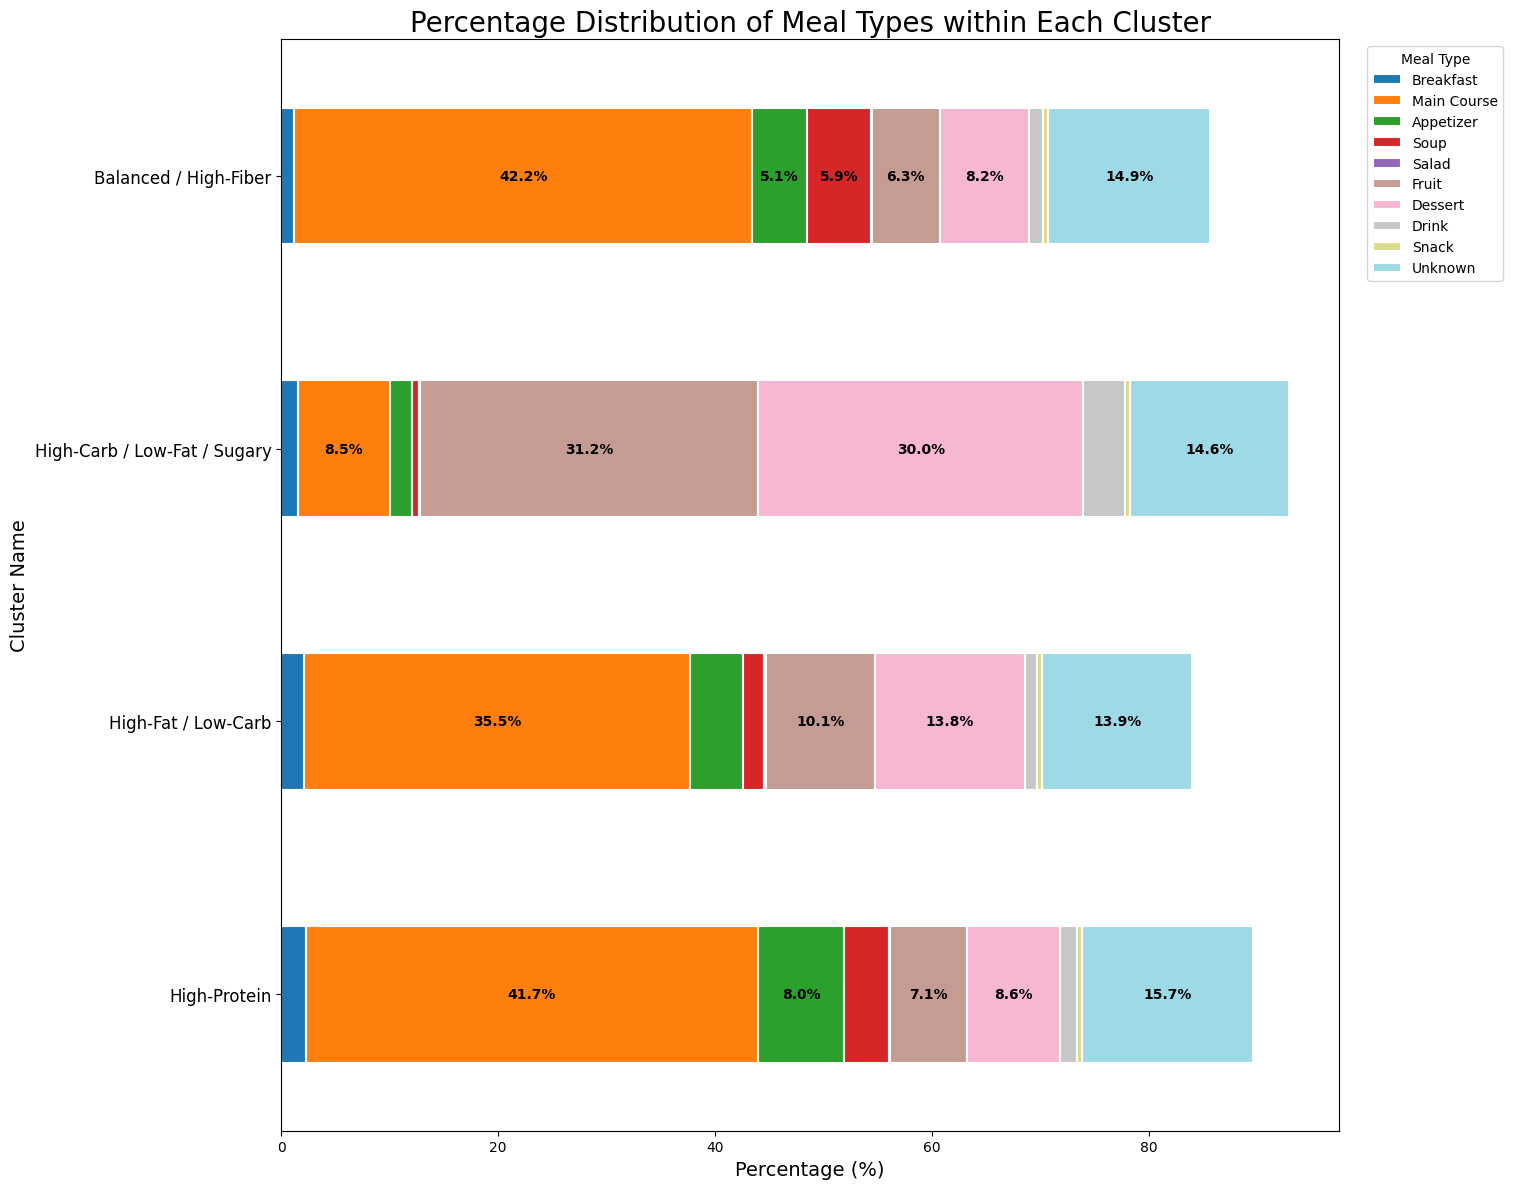

In [3]:

print("--- Step 1: Setting up Django Environment and Loading Data from PostgreSQL ---")

# --- 1.1: THAY ĐỔI CỐT LÕI - Tắt Async Safety Check ---
# Đặt biến môi trường này TRƯỚC KHI django.setup() được gọi
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
print("[INFO] Disabled Django's async safety check to allow ORM usage in Jupyter.")

# --- 1.2: Thiết lập Django Standalone ---
project_path = os.path.abspath(os.path.join(os.getcwd()))
if project_path not in sys.path:
    sys.path.append(project_path)
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'core.settings')

try:
    django.setup()
    from planner.models import Recipe
    from django.db.models import Count
    print("[SUCCESS] Django environment setup successful.")
except Exception as e:
    print(f"[ERROR] Failed to set up Django environment: {e}")

# --- 1.3: Tải Dữ liệu từ Database ---
df = None
try:
    print("Fetching all recipe data from PostgreSQL...")
    all_recipes_qs = Recipe.objects.all().values('cluster_name', 'meal_type')
    df = pd.DataFrame.from_records(all_recipes_qs)
    print(f"[SUCCESS] Data loaded successfully from database. Shape: {df.shape}")
except Exception as e:
    print(f"[ERROR] Failed to fetch data from database: {e}")

# --- 2. Thực hiện Phân tích (Phần còn lại giữ nguyên) ---
if df is not None and not df.empty:
    
    # --- Verification ---
    required_cols = ['cluster_name', 'meal_type']
    if all(col in df.columns for col in required_cols):
        print("\n[INFO] Required columns found. Proceeding with analysis.")
        
        # --- 2.1: Phân tích bằng Bảng Pivot ---
        print("\n--- Step 2.1: Statistical Breakdown ---")
        cluster_composition = pd.crosstab(df['cluster_name'], df['meal_type'])
        display(cluster_composition)
        
        # --- 2.2: Trực quan hóa ---
        print("\n--- Step 2.2: Visualizing Composition ---")
        cluster_composition_percent = cluster_composition.div(cluster_composition.sum(axis=1), axis=0) * 100
        meal_type_order = ['Breakfast', 'Main Course', 'Side', 'Appetizer', 'Soup', 'Salad', 'Fruit', 'Dessert', 'Drink', 'Snack', 'Unknown']
        ordered_columns = [col for col in meal_type_order if col in cluster_composition_percent.columns]
        cluster_composition_percent = cluster_composition_percent[ordered_columns]
        ax = cluster_composition_percent.plot(
            kind='barh', stacked=True, figsize=(18, 12),
            colormap='tab20', edgecolor='white', linewidth=1.5
        )
        ax.set_title('Percentage Distribution of Meal Types within Each Cluster', fontsize=20)
        ax.set_xlabel('Percentage (%)', fontsize=14)
        ax.set_ylabel('Cluster Name', fontsize=14)
        ax.legend(title='Meal Type', bbox_to_anchor=(1.02, 1), loc='upper left')
        ax.tick_params(axis='y', labelsize=12)
        ax.invert_yaxis()
        for container in ax.containers:
            labels = [f'{v:.1f}%' if v > 5 else '' for v in container.datavalues]
            ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10, fontweight='bold')
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()
        
    else:
        print("[ERROR] Required columns are missing. Cannot perform analysis.")

else:
    print("[INFO] Analysis skipped because DataFrame could not be loaded.")